In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import urllib2
import datetime
#---------------------------------------------------------------------------------------------------------------------
#               This is a small script which reads the latest real time solar wind data from NOAA
#---------------------------------------------------------------------------------------------------------------------
mag_url =  'http://services.swpc.noaa.gov/products/solar-wind/mag-7-day.json'
plasma_url = 'http://services.swpc.noaa.gov/products/solar-wind/plasma-7-day.json'
#Pulls as arrays
mag_arr = json.loads(urllib2.urlopen(mag_url).read())
plasma_arr = json.loads(urllib2.urlopen(plasma_url).read())


def records_to_timeseries(records_dict):
    from collections import OrderedDict
    timeseries = OrderedDict()
    column_names = records_dict[0]
    #Initialize
    for colname in column_names:
        timeseries[colname] = []
    #Loop over records    
    for record in records_dict[1:]:
        # Loop over fields/columns in each record
        for colname,coldatastr in zip(column_names,record):
            if colname == u'time_tag':
                coldata = datetime.datetime.strptime(coldatastr,
                                                    '%Y-%m-%d %H:%M:%S.000')
            else:
                try:
                    coldata = float(coldatastr)
                except:
                    print("Error formating jsonstr for %s: value %s" % (colname,coldatastr))
                    coldata = np.nan
            timeseries[colname].append(coldata)
    return timeseries

mag = records_to_timeseries(mag_arr)
plasma = records_to_timeseries(plasma_arr)


Error formating jsonstr for lon_gsm: value None
Error formating jsonstr for lon_gsm: value None
Error formating jsonstr for lon_gsm: value None
Error formating jsonstr for lon_gsm: value None
Error formating jsonstr for lon_gsm: value None


In [25]:
def plot_datadict(datadict,timekey=u'time_tag',figsize=(11,8),xlim=None):
    t = datadict[timekey]
    colkeys = [key for key in datadict if key!=timekey]
    n_plots = len(colkeys)
    f = plt.figure(figsize=figsize)
    axs = [f.add_subplot(n_plots,1,i+1) for i in range(n_plots)]
    for i,(colkey,ax) in enumerate(zip(colkeys,axs)):
        coldata = datadict[colkey]
        ax.plot(t,coldata,label=colkey)
        ax.set_ylabel(colkey)
        if xlim is not None:
            ax.set_xlim(xlim)
        if np.mod(i,2):
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
        ax.legend()
    f.autofmt_xdate()
    return f,axs

xlim = [datetime.datetime(2018,3,14,14),datetime.datetime(2018,3,14,23)]
plot_datadict(mag,xlim=xlim)
plot_datadict(plasma,xlim=xlim)

(<matplotlib.figure.Figure at 0x7effa6023b10>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7eff9e900bd0>])

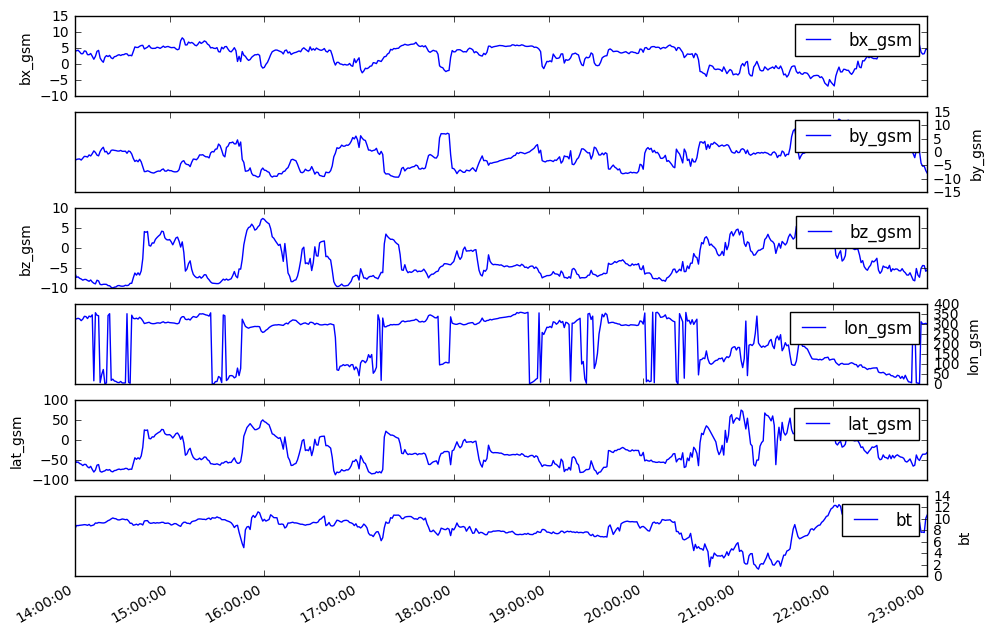

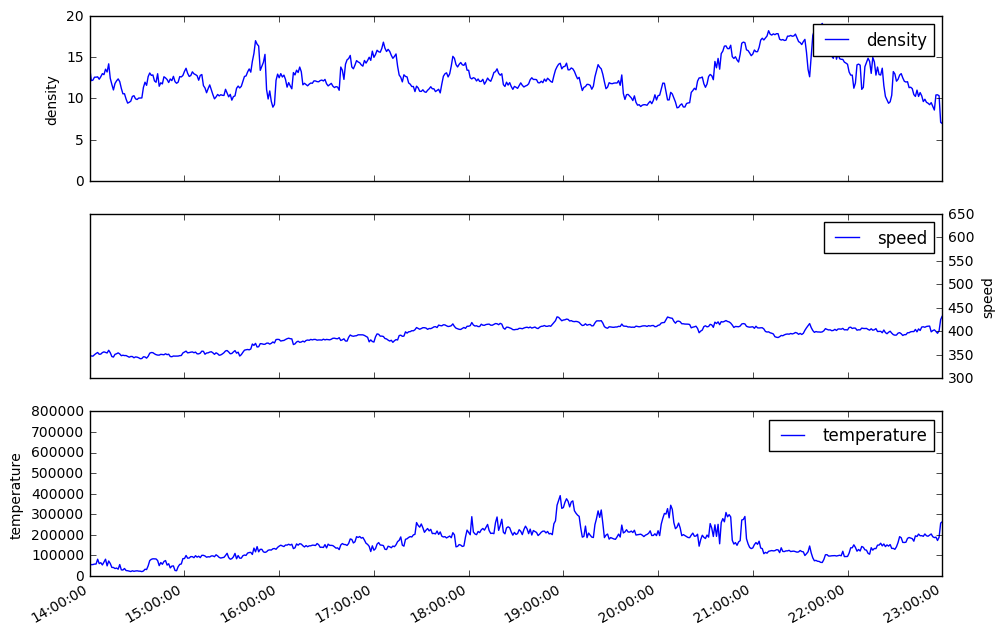

In [26]:
plt.show()